In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import metrics
import seaborn as sns
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
#import the data into a dataframe object and display first 10 records
df = pd.read_csv("concrete.csv")
df.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [3]:
#data types and other info of the ABT
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
#The above ABT info result shows there are no null values in any col and all are numeric values
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


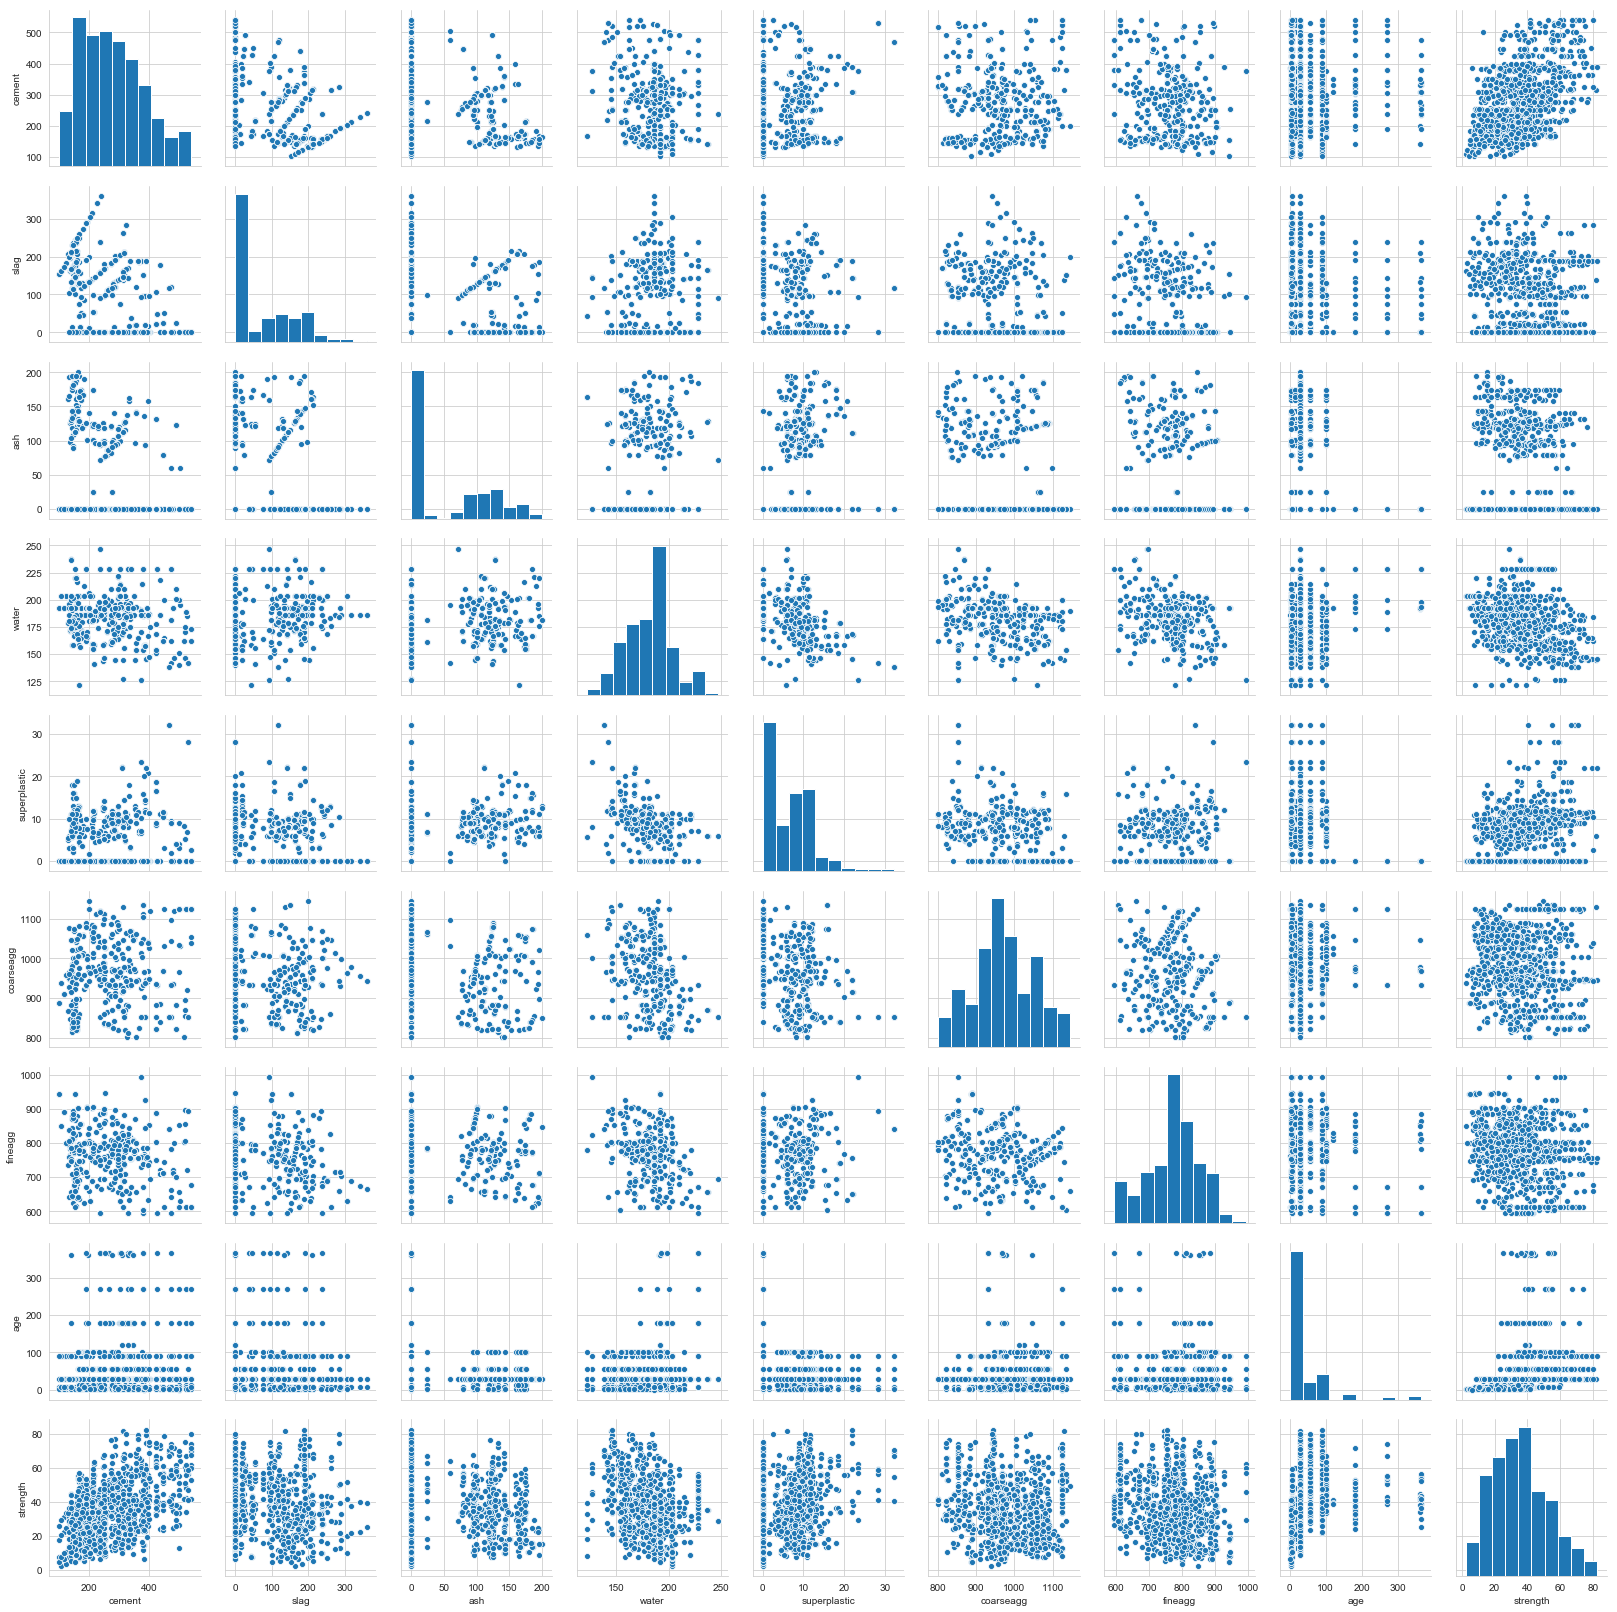

In [5]:
sns.set_style("whitegrid")
sns.pairplot(df)

We dont see PERFECT normal distribution in any of the columns. And only semi Gaussian curves for coarseagg, fineagg, water.
So its better to not use std. dev. to find and remove outliers if any in the columns

In [6]:
df.corr() #There are correlations between the 'strength' and other columns. More to be explored after outlier removal

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


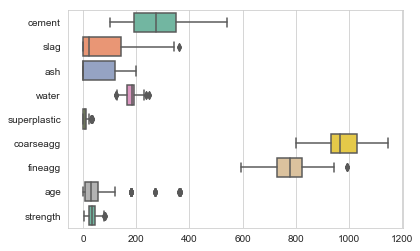

In [7]:
sns.boxplot(data=df, orient="h", palette="Set2")

In [8]:
#The columns slag,water,superplastic,fineagg,age have shown to have outliers. Lets see the outliers for them individually
df.slag.describe()

count    1030.000000
mean       73.895825
std        86.279342
min         0.000000
25%         0.000000
50%        22.000000
75%       142.950000
max       359.400000
Name: slag, dtype: float64

In [9]:
df.slag.loc[df['slag']>350]#outliers

918    359.4
990    359.4
Name: slag, dtype: float64

In [10]:
slag = df[df.slag < 350].slag #get the column without the outliers to be added to a new DF later

In [11]:
df.water.describe()

count    1030.000000
mean      181.567282
std        21.354219
min       121.800000
25%       164.900000
50%       185.000000
75%       192.000000
max       247.000000
Name: water, dtype: float64

In [12]:
df.water.loc[df['water']>240]#outliers

66     247.0
263    246.9
Name: water, dtype: float64

In [13]:
df.water.loc[df['water']<122]#outliers. But since these are more than 2 occurences fo same value we can consider them to be valid values

432    121.8
462    121.8
587    121.8
789    121.8
914    121.8
Name: water, dtype: float64

In [14]:
water = df[df.water < 240].water # outliers removed

In [15]:
df.superplastic.describe()

count    1030.000000
mean        6.204660
std         5.973841
min         0.000000
25%         0.000000
50%         6.400000
75%        10.200000
max        32.200000
Name: superplastic, dtype: float64

In [16]:
#Since 25% is having value as 0, we need to consider 0 as a valid value and since mean is much far away from the max value
#it would make more sense to use a imputer with 'most_frequent' strategy

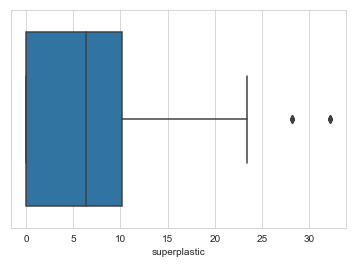

In [17]:
sns.boxplot(df.superplastic) #plotting for finer judgement of outlier values

In [18]:
df.superplastic.loc[df['superplastic']>24]#outliers

44      28.2
156     28.2
232     32.2
292     32.2
538     28.2
744     32.2
816     32.2
838     28.2
955     32.2
1026    28.2
Name: superplastic, dtype: float64

In [19]:
superplastic = df[df.superplastic < 24].superplastic # outliers removed

In [20]:
df.fineagg.describe()

count    1030.000000
mean      773.580485
std        80.175980
min       594.000000
25%       730.950000
50%       779.500000
75%       824.000000
max       992.600000
Name: fineagg, dtype: float64

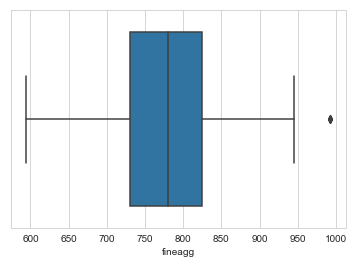

In [294]:
sns.boxplot(df.fineagg) #plotting for finer judgement of outlier values

In [21]:
df.fineagg.loc[df['fineagg']>950]#outliers. 

129    992.6
447    992.6
504    992.6
584    992.6
857    992.6
Name: fineagg, dtype: float64

In [22]:
fineagg = df[df.fineagg < 950].fineagg # outliers removed

In [23]:
df.age.describe()

count    1030.000000
mean       45.662136
std        63.169912
min         1.000000
25%         7.000000
50%        28.000000
75%        56.000000
max       365.000000
Name: age, dtype: float64

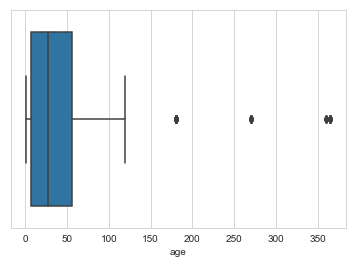

In [24]:
sns.boxplot(df.age) #plotting for finer judgement of outlier values

In [25]:
df.age.loc[df['age']>120]#outliers.

51      180
64      365
93      180
99      180
103     180
133     365
144     180
149     270
152     180
157     360
159     365
198     365
199     180
207     180
256     270
262     270
270     270
297     270
302     180
312     180
313     270
323     360
359     180
361     360
370     180
393     365
448     360
465     365
484     365
539     180
570     270
581     180
594     180
601     365
620     180
622     180
623     270
632     270
642     180
696     180
713     365
720     365
721     180
754     365
755     360
776     180
850     270
861     180
878     270
900     180
901     365
919     360
951     270
957     365
971     180
985     180
995     365
1017    180
1028    270
Name: age, dtype: int64

In [26]:
age = df[df.age < 120 ].age #outliers removed

In [27]:
#For the column 'water' too it would make more sense to use a imputer with 'most_frequent' strategy since the mean value
#also seems to be the 'most_frequent' one

In [28]:
df_new = pd.DataFrame(data={'cement':df.cement, 'slag':slag, 'ash': df.ash , 'water':water, 'superplastic': superplastic,
                           'coarseagg':df.coarseagg, 'fineagg': fineagg, 'age':age, 'strength':df.strength })
df_new.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,18.29


In [29]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1028 non-null float64
ash             1030 non-null float64
water           1028 non-null float64
superplastic    1020 non-null float64
coarseagg       1030 non-null float64
fineagg         1025 non-null float64
age             968 non-null float64
strength        1030 non-null float64
dtypes: float64(9)
memory usage: 80.5 KB


In [30]:
from sklearn.impute import SimpleImputer
imp_freq = SimpleImputer( strategy='most_frequent')
X = df_new.values[:,0:8]
y = df_new.values[:,8:9]
imp_freq.fit(X)
X = imp_freq.transform(X)

In [31]:
df_new.corr()#correlation matrix

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275650,-0.397467,-0.079810,0.012002,-0.109349,-0.239562,-0.033633,0.497832
slag,-0.275650,1.000000,-0.321795,0.106849,0.060288,-0.284497,-0.284760,-0.024119,0.137640
ash,-0.397467,-0.321795,1.000000,-0.260985,0.449737,-0.009961,0.092258,0.060625,-0.105755
water,-0.079810,0.106849,-0.260985,1.000000,-0.651169,-0.175102,-0.429667,-0.040445,-0.289777
superplastic,0.012002,0.060288,0.449737,-0.651169,1.000000,-0.226016,0.159306,0.066508,0.348607
coarseagg,-0.109349,-0.284497,-0.009961,-0.175102,-0.226016,1.000000,-0.161666,0.011490,-0.164935
fineagg,-0.239562,-0.284760,0.092258,-0.429667,0.159306,-0.161666,1.000000,0.042392,-0.183181
age,-0.033633,-0.024119,0.060625,-0.040445,0.066508,0.011490,0.042392,1.000000,0.519916
strength,0.497832,0.137640,-0.105755,-0.289777,0.348607,-0.164935,-0.183181,0.519916,1.000000


In [32]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

In [33]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100,n_jobs = -1,bootstrap = True,random_state = 42)
rf.fit(X_train, y_train)

print('RandomForest Training Score: {:.2f} \nRandomForest Test Score: {:.2f}'.format(rf.score(X_train, y_train),
                                                                                             rf.score(X_test, y_test)))

C:\Users\homepc\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForest Training Score: 0.98 
RandomForest Test Score: 0.90


From the above it seems the 7th column 'fineaggregate' is the most important for concrete strength followed by 'cement' and 'coarseaggregate'

In [34]:
rf = RandomForestRegressor(n_estimators = 10,n_jobs = -1,bootstrap = True,random_state = 42)
rf.fit(X_train, y_train)

print('RandomForest Training Score: {:.2f} \nRandomForest Test Score: {:.2f}'.format(rf.score(X_train, y_train),
                                                                                             rf.score(X_test, y_test)))

C:\Users\homepc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForest Training Score: 0.97 
RandomForest Test Score: 0.89


In [35]:
rf = RandomForestRegressor(n_estimators = 25,n_jobs = -1,bootstrap = True,random_state = 42)
rf.fit(X_train, y_train)

print('RandomForest Training Score: {:.2f} \nRandomForest Test Score: {:.2f}'.format(rf.score(X_train, y_train),
                                                                                             rf.score(X_test, y_test)))

C:\Users\homepc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForest Training Score: 0.97 
RandomForest Test Score: 0.90


In [36]:
rf.feature_importances_

array([0.3078709 , 0.06784914, 0.02144403, 0.14281562, 0.05461963,
       0.03012736, 0.03276455, 0.34250876])

In [41]:
print (pd.DataFrame(rf.feature_importances_, columns = ["Imp"]))

        Imp
0  0.307871
1  0.067849
2  0.021444
3  0.142816
4  0.054620
5  0.030127
6  0.032765
7  0.342509
